# Next Gen Gaming Laptops
Analyzing the dataset to get insights and answer questions like why certain laptops are so popular:

In [1]:
# Loading all the required libraries:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px

/kaggle/input/new-egg-gaming-laptops/new_egg_gaming_laptops.csv


Reading the dataset and viewing its top ten rows:

In [2]:
df = pd.read_csv('new_egg_gaming_laptops.csv')
df.head(10)

,laptop_name,price,brand_name,rating,num_to_rate,shiping,save_prec,touch,display,processor,gpu,hdd,ssd
0,"GIGABYTE AERO 15-X9-9RT4K5MP 15.6"" 4K/UHD IPS ...",3099.0,GIGABYTE,Rating + 4,363,Free Shipping,NaN,0,"15.6""",i9,RTX 2070,NaN,1 TB SSD
1,"Lenovo Y50 Touch (59426255) 15.6"" Intel Core i...",1684.0,Lenovo,Rating + 3,186,Free Shipping,NaN,1,"15.6""",i7,GTX 860,1 TB HDD,8 GB SSD
2,MSI GP63 Leopard-013 Gaming Laptop GTX 1060 6 ...,1530.0,MSI,Rating + 4,156,Free Shipping,NaN,0,"15.6""",i7,GTX 1060,NaN,NaN
3,MSI GS Series GS65 Stealth THIN-053 Gaming Lap...,2499.0,MSI,Rating + 4,155,Free Shipping,NaN,0,"15.6""",i7,GTX 1070,NaN,NaN
4,Acer Aspire V15 Nitro Black Edition VN7-591G-7...,895.0,Acer America,Rating + 4,100,Free Shipping,NaN,0,"15.6""",i7,GTX 960,1 TB HDD,NaN
5,"Acer Aspire 7 17.3"" IPS FHD 60 Htz GTX 1060 6...",849.0,Acer America,Rating + 4,99,Free Shipping,29%,0,"17.3""",i7,GTX 1060,NaN,256 GB SSD
6,"Lenovo Y700-17ISK (80Q000C0US) 17.3"" IPS Intel...",1299.0,Lenovo,Rating + 4,99,Free Shipping,19%,0,"17.3""",i7,GTX 960,1 TB HDD,128 GB SSD
7,"MSI GL63 15.6"" Full HD Gaming Notebook Compute...",1099.0,MSI,Rating + 4,92,Special Shipping,23%,0,"15.6""",i7,GTX 1060,NaN,256GB SSD
8,DELL Inspiron i7559-2512BLK Gaming Laptop Inte...,799.0,DELL,Rating + 3,72,$5.40 Shipping,20%,0,"15.6""",i7,GTX 960,1 TB HDD,8 GB SSD
9,"ASUS N550JX-DS71T 15.6"" IPS 4th Generation Int...",1499.0,ASUS,Rating + 3,51,Free Shipping,NaN,0,"15.6""",i7,GTX 950,1 TB HDD,NaN


Here we have data for the new generation laptops in the market. The dataset contains 13 columns. Description of all the columns is as follows: (from the left-most column):
1. Full name of the laptop
2. Price of laptop in dollars
3. Name of the brand that the laptop belongs to
4. Rating of the item out of 5 stars
5. Number of customers rate this item
6. Shipping description
7. Percentage of saving from original price
8. If the word touch in the laptop name (1) or not (0)
9. Display in inches
10. The name of microprocessor
11. Graphics Processing Unit (graphics card) present in the laptop
12. Hard Disk Drive (mechanical, spinning disk storage) 
13. Solid State Drive (electronic, integrated circuits storage)

Now, I'm going to perform a quick exploratory data analysis using profiling. This will give the overview of the dataset and the distribution of each variable. Firstly, I'll import pandas_profiling library:

In [3]:
import pandas_profiling

Now I'm initiating profiling on our dataset df:

In [4]:
pandas_profiling.ProfileReport(df)

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning:

Consider using IPython.display.IFrame instead



From profiling, I've got the following information about this dataset:
1. Number of columns(variables) = 13 (as discussed also above)
2. Number of rows = 254
3. Total missing cells(values) in the dataset = 408 (ie; 12.4% of all the cells is missing)
4. Number of categorical variables in the dataset = 10
5. Number of numerical variables = 2
6. Number of boolean variables = 1 (the 'Touch' column has boolean values)
7. First column has no missing values (NaNs)
8. 2nd column has 1 missing value. Also, the average price of laptops is $1550.58 US
9. 3rd column has no NaNs. Total 11 companies are mentioned in the dataset
10. Out of total laptops:
* 86 are rated 5 stars
* 91 are rated 4 stars
* 48 are rated 3 stars
* 11 are rated 2 stars
* 18 are rated 1 stars
11. 162 laptops shipped(sold) to customers as free shipping
* There's a 'Special Shipping' category in which 56 laptops were shipped
* All other laptops have various shipping charges
12. There are total 35 kinds of discounts
* Maximum of 24 laptops sold for 23% discount
* 8 laptops were sold for 25% discount
* There are 137 NaNs in save_prec column
13. Laptops are distributed in total 8 kinds of display models
* Though there are 18 NaNs in display column
* 145 models are having display screen of 15.6 inches
* 66 models are having display screen of 17.3 inches
14. There are total 9 types of microprocessors
* 5 missing values in processor column
* 12 models are having intel i9 processor
* 175 models are having intel i7 processor
* 38 models are having intel i5 processor
* 11 models are having AMD R5 processor
* 4 models are having AMD R0 processor
15. There are 17 types of graphics cards
* 62 models are having GTX 1050 gpu
* 45 models are having GTX 1060 gpu
* 24 models are having GTX 1070 gpu
* 22 models are having RTX 2070
* 20 models are having RTX 2060
* 21 NaNs in gpu column
* 21 NaNs in gpu can also mean some models don't have gpu.
16. There are 7 types of hd drives
* But what is visible from the distribution is that, 1TB HDD is mentioned in various forms
* Total models with 1TB HDD = 77 + 20 + 1
* Other models are of 2TB HDD & 500GB HDD
* 150 NaNs in hdd column
17. There are 25 types of ss drives
* These are PCIe, NVMe, standard types
* Maximum ssd memory available is of 1TB
* 76 NaNs in ssd column

# Data Cleaning:
Here I'll first check which variables are having missing values:

In [5]:
categorical_nan = [feature for feature in df.columns if df[feature].isna().sum()>0 and df[feature].dtypes=='O']
print(categorical_nan)

['save_prec', 'display', 'processor', 'gpu', 'hdd', 'ssd']


Alright so 'save_prec', 'display', 'processor', 'gpu', 'hdd' & 'ssd' columns are having missing values. Now I'm filling these missing values with "Empty":

In [7]:
for feature in categorical_nan:
    df[feature] = df[feature].fillna('Empty')

But before moving forward, I need to verify if the missing values got filled or not:

In [8]:
df[categorical_nan].isna().sum()

save_prec    0
display      0
processor    0
gpu          0
hdd          0
ssd          0
dtype: int64

Alright, now I'm good to explore the dataset. First I'll do it using WordCloud:

# Data Visualization:
This dataset looks very fascinating. Let me explore it thoroughly:

So firstly I'll see which are the **most common laptop_name**:

<Figure size 720x432 with 0 Axes>

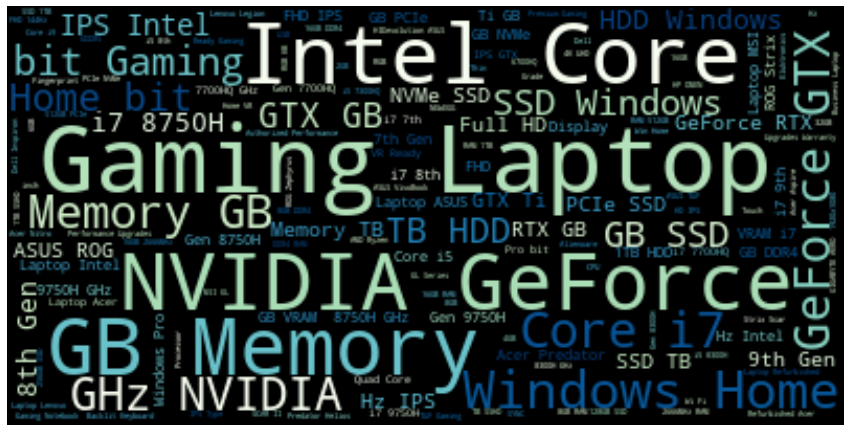

In [9]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.laptop_name)
# Creating and generating a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='GnBu', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Displaying the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

Haha, okay this looks messed up. I better look at **most common** **brand_name**:

<Figure size 720x432 with 0 Axes>

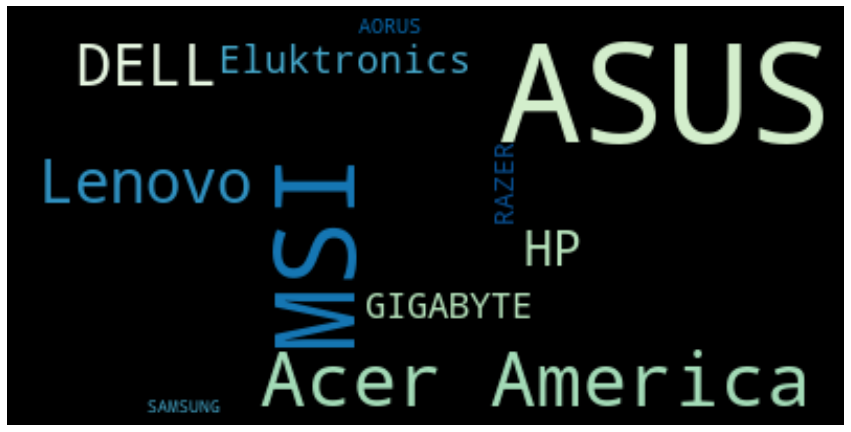

In [10]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.brand_name)
# Creating and generating a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='GnBu', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Displaying the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

Yep now this looks better. So MSI, ASUS & Acer America are looking the most common brands. Then Lenovo, Dell & Gigabyte. Then others.

How about most common microprocessor? Let me see that:

<Figure size 720x432 with 0 Axes>

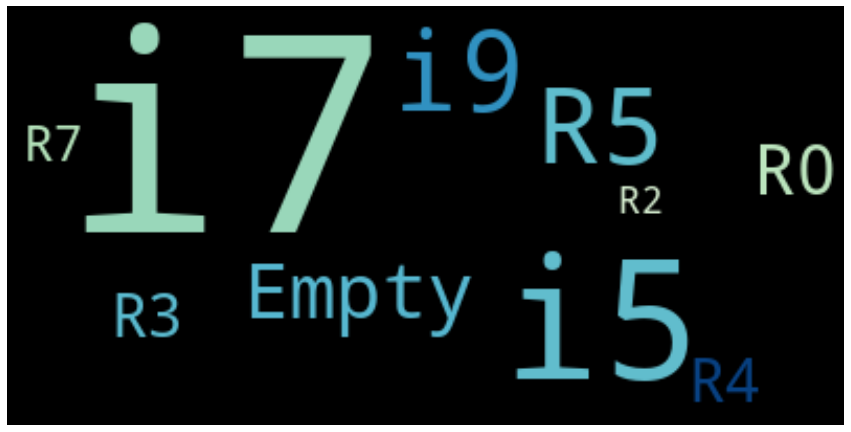

In [13]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.processor)
# Creating and generating a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='GnBu', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Displaying the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

So most models have **intel i7**, then the second most common processor is **intel i5**. Followed by R5 & i9.

Time to see the most common graphics card (my favorite category):

<Figure size 720x432 with 0 Axes>

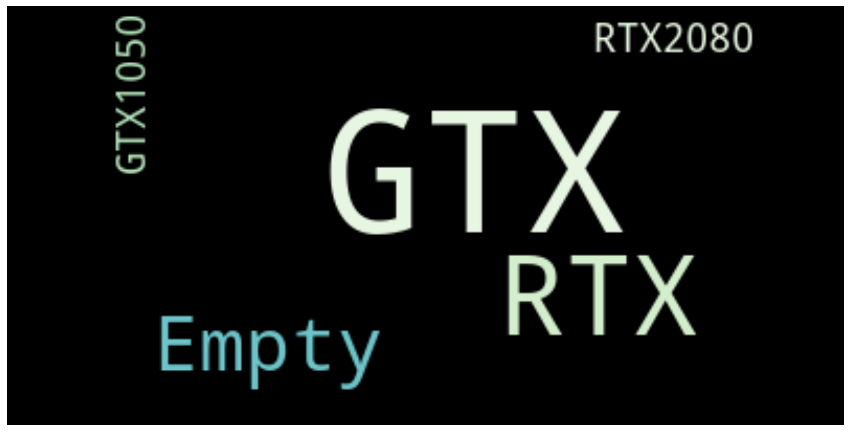

In [15]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.gpu)
# Creating and generating a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='GnBu', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Displaying the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

So it's Nvidia all over the dataset! **Nvidia GTX** series is the most common in dataset, followed by **Nvidia RTX** series. Nvidia GTX is GeForce Giga Texel Shader eXtreme series. RTX is comparatively a new technology which operates on **Real Time Ray Tracing**. More on that later :P

Let's also see the most common hard disk drive:

<Figure size 720x432 with 0 Axes>

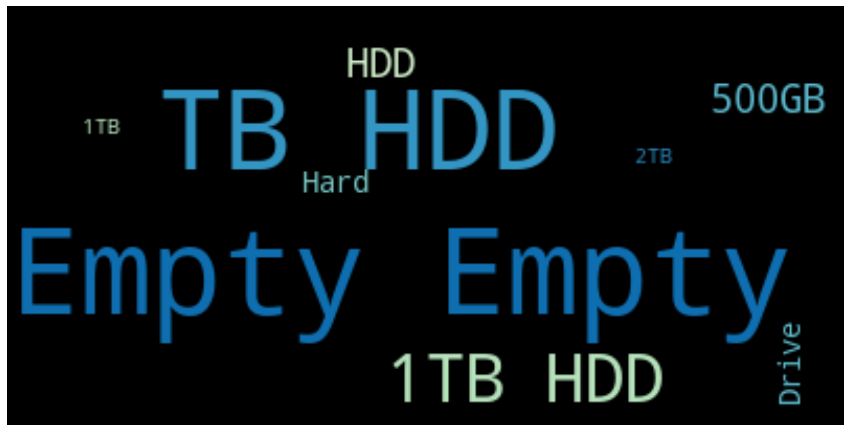

In [16]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.hdd)
# Creating and generating a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='GnBu', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Displaying the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

Seems like 1TB HDD is the most common one. Followed by 500GB HDD and the least common is 2TB HDD. Well, seems like very few 2TB models are getting sold. But why is it like that? 2TB HDD should be sold more as it's not double the price of 1TB HDD, as some people may think. :P

Coming to solid state drive:

<Figure size 720x432 with 0 Axes>

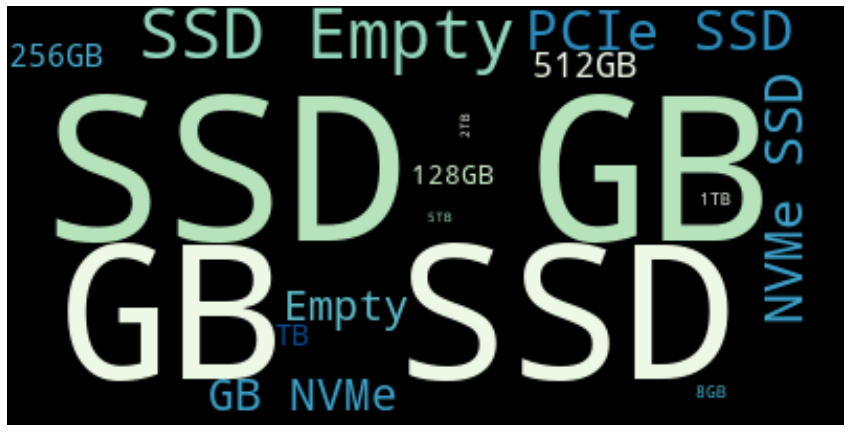

In [18]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.ssd)
# Creating and generating a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='GnBu', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Displaying the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

So standard ssd models are getting sold most. NVMe & PCIe models purchases are balanced. And looks like 1TB & 2TB models are barely sold. Yes may be it's because solid state drives are expensive. One surprising thing, though, is that a customer has purchased 5TB SSD! That's something! (You can see that tiny mention of 5TB at the middle). Meanwhile, one funny thing is that somebody purchased 8GB SSD. Lol :D

## Pie Charts:
Now I'll visualize the data using pie-charts:

Plotting a pie-chart for the "Highest Selling Brands":

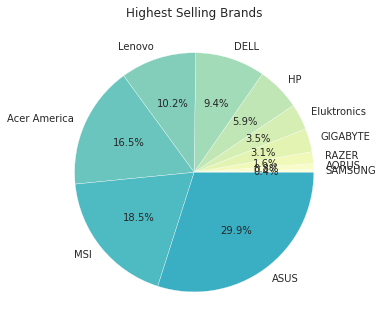

In [35]:
color = plt.cm.YlGnBu(np.linspace(0,1,20))
df["brand_name"].value_counts().sort_values(ascending=True).head(20).plot.pie(y="laptop_name",colors=color,autopct="%0.1f%%")
plt.title("Highest Selling Brands")
plt.axis("off")
plt.show()

Plotting a pie-chart for the "Most Selling GPUs":

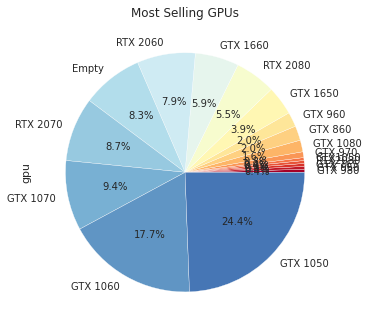

In [39]:
color = plt.cm.RdYlBu(np.linspace(0,1,20))
df["gpu"].value_counts().sort_values(ascending=True).head(20).plot.pie(y="laptop_name",colors=color,autopct="%0.1f%%")
plt.title("Most Selling GPUs")
plt.axis("on")
plt.show()

So Nvidia GTX series is sold the most. Moreover, GTX 1050 is highest selling GPU in the market. Followed by GTX 1060.

Let me now see which laptops in the dataset have GTX 1050 GPU:

In [47]:
gtx_105 = df[(df['gpu']=='GTX 1050')].reset_index(drop=True)
gtx_105.head(30)

,laptop_name,price,brand_name,rating,num_to_rate,shiping,save_prec,touch,display,processor,gpu,hdd,ssd
0,"ASUS FX504GD-NH51 15.6"" IPS GTX 1050 Intel 8th...",669.0,ASUS,Rating + 3,50,Free Shipping,Empty,0,"15.6""",i5,GTX 1050,Empty,256 GB SSD
1,"ASUS TUF Gaming FX504GE-ES72 15.6"" IPS Intel C...",988.0,ASUS,Rating + 4,42,Free Shipping,Empty,0,"15.6""",i7,GTX 1050,Empty,256 GB SSD
2,"MSI GL Series GL73 9RCX-030 17.3"" 60 Hz Intel ...",699.0,MSI,Rating + 4,38,Free Shipping,22%,0,"17.3""",i5,GTX 1050,Empty,256 GB NVMe SSD
3,ASUS ROG STRIX Scar Edition 120 Hz Display GL5...,1447.0,ASUS,Rating + 4,32,Free Shipping,Empty,0,"15.6""",i7,GTX 1050,Empty,Empty
4,"DELL Inspiron 15 i5577-5328BLK-PUS 15.6"" Intel...",694.0,DELL,Rating + 4,28,Free Shipping,31%,0,"15.6""",i5,GTX 1050,1 TB HDD,Empty
5,"Lenovo Legion Y520 (80WK00HSUS) 15.6"" IPS Inte...",1399.0,Lenovo,Rating + 3,26,Free Shipping,Empty,0,"15.6""",i7,GTX 1050,Empty,256 GB SSD
6,"MSI GL62M 15.6"" IPS GTX 1050 i5-7300HQ 8 GB Me...",999.0,MSI,Rating + 4,24,$9.99 Shipping,Empty,0,"15.6""",i5,GTX 1050,Empty,256 GB SSD
7,"ASUS VivoBook M580VD-EB76 15.6"" Intel Core i7 ...",1866.0,ASUS,Rating + 4,20,Free Shipping,Empty,0,"15.6""",i7,GTX 1050,1 TB HDD,256 GB SSD
8,"Acer Aspire 7 A715-72G-79BH 15.6"" IPS GTX 1050...",749.0,Acer America,Rating + 4,18,Free Shipping,25%,0,"15.6""",R5,GTX 1050,1 TB HDD,Empty
9,"ASUS ROG GL503VD-DB74 15.6"" Intel Core i7 7th ...",1349.0,ASUS,Rating + 3,17,$23.99 Shipping,Empty,0,"15.6""",i7,GTX 1050,1 TB HDD,256 GB SSD


Now I'll see which ones have GTX 1060 GPU:

In [48]:
gtx_106 = df[(df['gpu']=='GTX 1060')].reset_index(drop=True)
gtx_106.head(30)

,laptop_name,price,brand_name,rating,num_to_rate,shiping,save_prec,touch,display,processor,gpu,hdd,ssd
0,MSI GP63 Leopard-013 Gaming Laptop GTX 1060 6 ...,1530.0,MSI,Rating + 4,156,Free Shipping,Empty,0,"15.6""",i7,GTX 1060,Empty,Empty
1,"Acer Aspire 7 17.3"" IPS FHD 60 Htz GTX 1060 6...",849.0,Acer America,Rating + 4,99,Free Shipping,29%,0,"17.3""",i7,GTX 1060,Empty,256 GB SSD
2,"MSI GL63 15.6"" Full HD Gaming Notebook Compute...",1099.0,MSI,Rating + 4,92,Special Shipping,23%,0,"15.6""",i7,GTX 1060,Empty,256GB SSD
3,Refurbished: Acer Predator Helios 300 G3-571-7...,949.0,Acer America,Rating + 4,41,Free Shipping,Empty,0,"15.6""",i7,GTX 1060,Empty,256 GB SSD
4,"Acer Helios 300 PH317-51-7578 17.3"" GTX 1060 6...",1549.0,Acer America,Rating + 4,33,Free Shipping,Empty,0,"17.3""",i7,GTX 1060,1 TB HDD,128 GB SSD
5,"ASUS GL703VM-NH74 17.3"" Intel Core i7 7th Gen ...",1799.0,ASUS,Rating + 4,29,Free Shipping,10%,0,"17.3""",i7,GTX 1060,1 TB HDD,256 GB SSD
6,"Lenovo Legion Y720 80VR001BUS 15.6"" FHD GTX 10...",1577.0,Lenovo,Rating + 4,24,Special Shipping,Empty,0,"15.6""",R0,GTX 1060,1 TB HDD,128 GB SSD
7,"ASUS ROG Zephyrus M GM501GM-WS74 15.6"" Ultra S...",2616.0,ASUS,Rating + 4,15,Free Shipping,25%,0,"15.6""",i7,GTX 1060,Empty,256 GB PCIe SSD
8,"ASUS GL503VM-IH73 15.6"" Intel Core i7 7th Gen ...",1349.0,ASUS,Rating + 4,13,Free Shipping,Empty,0,"15.6""",i7,GTX 1060,1 TB HDD,Empty
9,"The Razer Blade GeForce GTX 1060 VR Ready, 14""...",1899.0,RAZER,Rating + 3,9,Free Shipping,37%,0,Empty,i7,GTX 1060,Empty,512 GB SSD


I'll now see the **best rated laptops** of them all:

In [50]:
rating = df[(df['rating']=='Rating + 5')].reset_index(drop=True)
rating.head(30)

,laptop_name,price,brand_name,rating,num_to_rate,shiping,save_prec,touch,display,processor,gpu,hdd,ssd
0,"Razer Blade RZ09-01021101-R3U1 14.0"" Intel Cor...",3799.0,RAZER,Rating + 5,24,Free Shipping,Empty,0,"14.0""",R3,GTX 765,Empty,256 GB SSD
1,AERO 15 OLED SA-7US5020SH UHD AMOLED i7-9750H ...,1399.0,GIGABYTE,Rating + 5,10,Free Shipping,18%,0,Empty,i7,GTX 1660,Empty,Empty
2,Eluktronics MECH-15 G2Rx Slim & Light NVIDIA G...,1399.0,Eluktronics,Rating + 5,6,Special Shipping,13%,0,15.6â,i7,GTX 1660,Empty,512GB NVMe SSD
3,"ASUS ROG GX531GM-DH74 15.6"" 144 Hz Intel Core ...",1499.0,ASUS,Rating + 5,6,$19.10 Shipping,Empty,0,"15.6""",i7,GTX 1060,Empty,512 GB SSD
4,"HP Omen X 17-ap010nr 17.3"" FHD IPS GTX 1070 8 ...",1899.0,HP,Rating + 5,5,Free Shipping,5%,0,"17.3""",i7,GTX 1070,1 TB HDD,256 GB SSD
5,"ASUS ROG Strix GL703GE-DB71-CA 17.3"" 120 Hz In...",1671.0,ASUS,Rating + 5,5,Free Shipping,Empty,0,"17.3""",i7,GTX 1050,Empty,256 GB SSD
6,"ASUS VivoBook K570ZD Laptop, 15.6"" FHD IPS-lev...",599.0,ASUS,Rating + 5,4,Free Shipping,Empty,0,"15.6""",R4,GTX 1050,Empty,256 GB PCIe SSD
7,"Lenovo Legion Y545 PG0, 15.6""LED backlit FHD I...",1249.0,Lenovo,Rating + 5,4,Free Shipping,11%,0,"15.6""",R5,GTX 1650,Empty,256GB SSD
8,"DELL i7577-5265BLK 15.6"" FHD IPS GTX 1060 6 G...",730.0,DELL,Rating + 5,4,Free Shipping,Empty,0,"15.6""",i7,GTX 1060,Empty,256 GB SSD
9,"ASUS ROG Strix III Hero G731GV-DB74 17.3"" 144 ...",1725.0,ASUS,Rating + 5,4,$16.99 Shipping,Empty,0,"17.3""",i7,RTX 2060,Empty,512 GB PCIe SSD


Finally, the least rated laptops:

In [51]:
rating_low = df[(df['rating']=='Rating + 1')].reset_index(drop=True)
rating_low.head(30)

,laptop_name,price,brand_name,rating,num_to_rate,shiping,save_prec,touch,display,processor,gpu,hdd,ssd
0,"ASUS VivoBook Pro 15, 15.6"" Full HD IPS Level ...",1118.0,ASUS,Rating + 1,2,Free Shipping,Empty,0,"15.6""",i7,GTX 1050,1 TB HDD,Empty
1,"Dell G7 15 7590 Gaming Laptop 15.6"" Display In...",1349.0,DELL,Rating + 1,1,Special Shipping,16%,0,"15.6""",i7,RTX 2060,1TB HDD,128GB SSD
2,"2019 Legion Y540 15.6"" FHD IPS Gaming Laptop, ...",919.0,Lenovo,Rating + 1,1,Free Shipping,23%,0,"15.6""",i7,GTX 1650,500GB HDD,Empty
3,ASUS TUF Gaming FX705DT Gaming and Entertainme...,1149.0,ASUS,Rating + 1,1,Special Shipping,23%,0,"17.3""",Empty,GTX 1650,Empty,512GB PCIe SSD
4,"Refurbished: Acer Aspire 7 A717-72G-700J 17.3""...",849.0,Acer America,Rating + 1,1,Free Shipping,29%,0,"17.3""",i7,GTX 1060,Empty,256 GB SSD
5,Lenovo LEGION Y520 Gaming and Business Laptop ...,1399.0,Lenovo,Rating + 1,1,Special Shipping,20%,0,"15.6""",i7,GTX 1060,Empty,512GB PCIe SSD
6,"ASUS ZenBook Pro UX580GE-XB74T 15.6"" Intel Cor...",1999.0,ASUS,Rating + 1,1,Free Shipping,Empty,0,"15.6""",i9,GTX 1050,Empty,512 GB SSD
7,DELL Inspiron 15 7000 Gaming Laptop Intel Core...,869.0,DELL,Rating + 1,1,Free Shipping,Empty,0,"15.6""",i5,GTX 960,Empty,256 GB SSD
8,"ASUS G703GS-WS71 17.3"" FHD 144Hz Intel i7-8750...",2199.0,ASUS,Rating + 1,1,Special Shipping,23%,0,"17.3""",i7,GTX 1070,Empty,Empty
9,"Lenovo Legion Y520 15.6"" FHD, Quad-Core i7 770...",1199.0,Lenovo,Rating + 1,1,Free Shipping,37%,0,"15.6""",i7,GTX 1060,Empty,512GB NVMe SSD


So MSI brand is the best rated next gen laptops. Dell is least rated next gen laptop. ASUS is in both categories. Cool! 

As I've got a lot of interesting information from this dataset I think I should stop here now. Thank you for your time. Regards.
* Rachit Shukla